In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
# Load the dataset
df = pd.read_csv('seasonal_coconut_yield_data_2.csv', parse_dates=['Date'], index_col='Date')


In [24]:
df.head(2)

,Coconut Yield (kg)
Date,
2015-01-31,3899.014246
2015-02-28,4257.558815


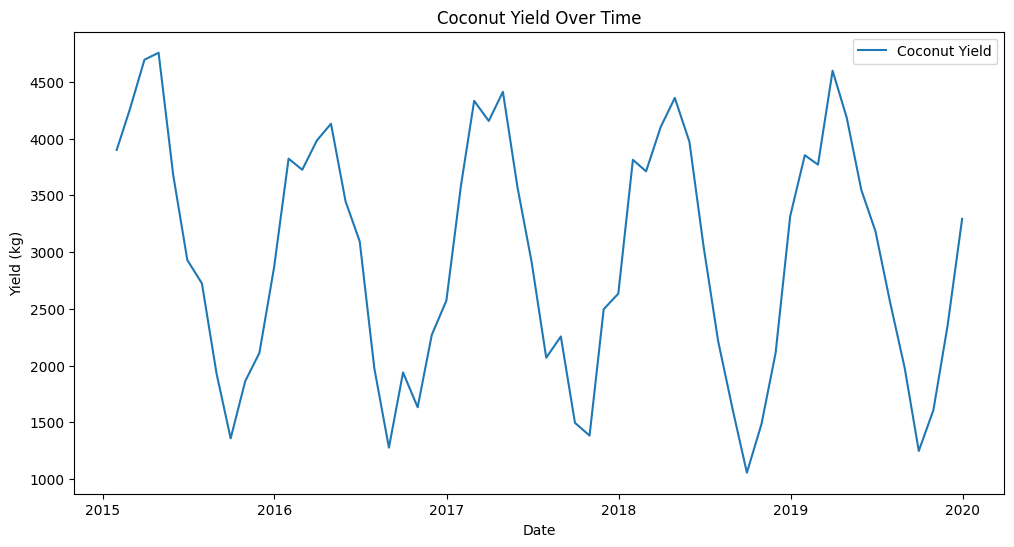

In [25]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Coconut Yield (kg)'], label='Coconut Yield')
plt.title('Coconut Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Yield (kg)')
plt.legend()
plt.show()

In [26]:
# Test for stationarity (ADF test)
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

In [27]:
test_stationarity(df['Coconut Yield (kg)'])

ADF Statistic: -2.6462770355644216
p-value: 0.08380487011986637


In [52]:
# Differencing to make the series stationary if needed
df['Coconut Yield (kg)'] = df['Coconut Yield (kg)'].diff().dropna()

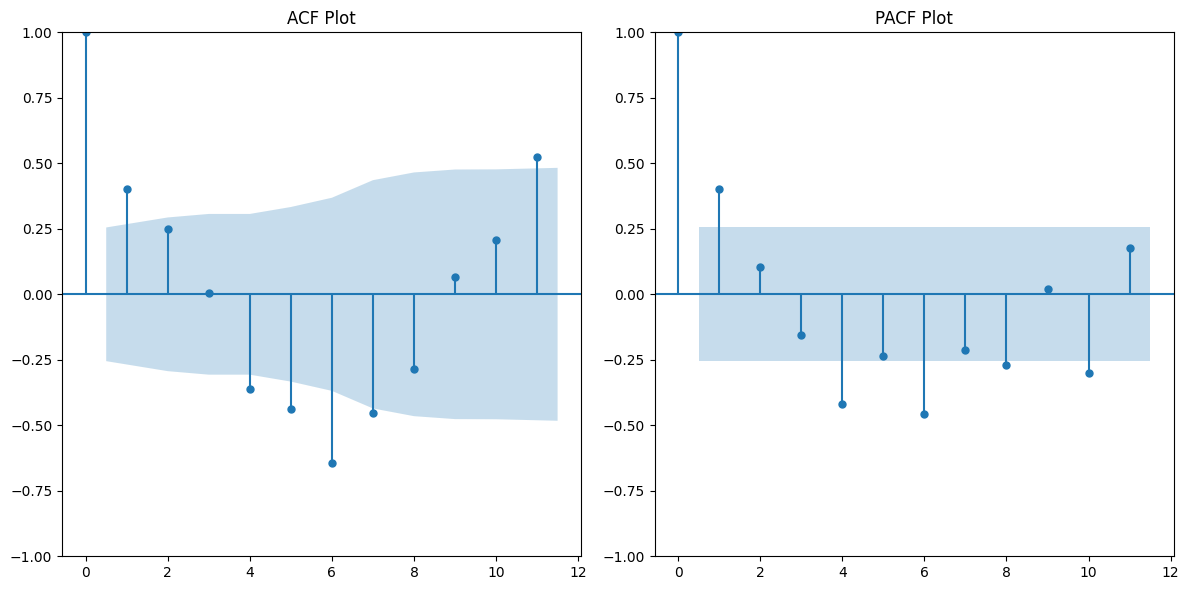

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'Coconut Yield (kg)' is your target series
# Use the first difference to make the series stationary if not done already
df['Yield_Diff'] = df['Coconut Yield (kg)'].diff().dropna()

# ACF and PACF plots
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['Yield_Diff'].dropna(), lags=11, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df['Yield_Diff'].dropna(), lags=11, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


In [29]:
# Train-test split
train_size = int(len(df) * 0.8)
train, test = df['Coconut Yield (kg)'][:train_size], df['Coconut Yield (kg)'][train_size:]


In [30]:
from pmdarima import auto_arima

# Automatically find the best ARIMA order
model = auto_arima(train, seasonal=False, stepwise=True, trace=True)

# Output the best order found
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=757.855, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=910.630, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=764.660, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=758.591, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=759.982, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=736.681, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=761.041, Time=0.03 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 0.886 second

In [31]:
# Fit the ARIMA model
model = sm.tsa.ARIMA(train, order=(3, 0, 2))  # Adjust the order as necessary
model_fit = model.fit()

c:\Users\sheha\anaconda3\envs\ADHD\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\sheha\anaconda3\envs\ADHD\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\sheha\anaconda3\envs\ADHD\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\sheha\anaconda3\envs\ADHD\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\sheha\anaconda3\envs\ADHD\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum

In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Coconut Yield (kg)   No. Observations:                   48
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -344.671
Date:                Sat, 02 Nov 2024   AIC                            703.343
Time:                        16:57:14   BIC                            716.441
Sample:                    01-31-2015   HQIC                           708.293
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2930.2168     65.496     44.739      0.000    2801.848    3058.586
ar.L1          1.7835      0.272      6.558      0.000       1.250       2.317
ar.L2         -1.0896      0.472     -2.309      0.021      -2.015      -0.165
ar.L3          0.0518      0.272      0.190      0.849      -0.482       0.586
ma.L1         -1.7263      0.335     -5.160      0.000      -2.382      -1.071
ma.L2          0.9995      0.381      2.621      0.009       0.252       1.747
sigma2      1.094e+05   2.28e-05   4.79e+09      0.000    1.09e+05    1.09e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.88
Prob(Q):                              1.00   Prob(JB):                         0.39
Heteroskedasticity (H):               0.83   Skew:                             0.11
Prob(H) (two-sided):                  0.71   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.88e+28. Standard errors may be unstable.
"""

In [33]:
# Forecasting
forecast = model_fit.forecast(steps=len(test))
test_index = test.index
forecast_series = pd.Series(forecast, index=test_index)

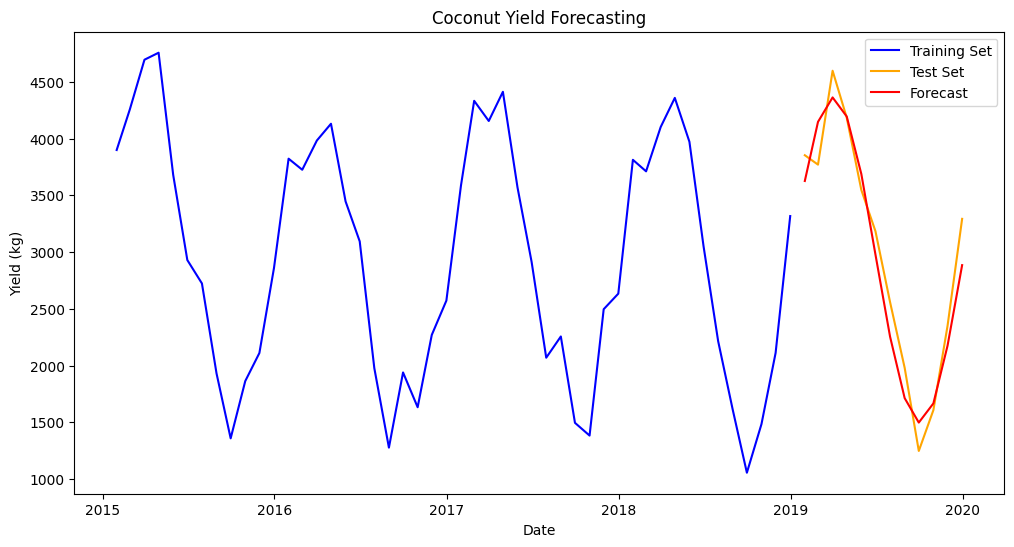

In [34]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Set', color='blue')
plt.plot(test.index, test, label='Test Set', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.title('Coconut Yield Forecasting')
plt.xlabel('Date')
plt.ylabel('Yield (kg)')
plt.legend()
plt.show()

In [36]:
# Model Evaluation
mae = mean_absolute_error(test, forecast_series)
rmse = np.sqrt(mean_squared_error(test, forecast_series))
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 221.55926077794732
Root Mean Squared Error: 247.9246588977794
